**<h1>Tarea2: Movimiento de un sólido</h1>**
<h2>Movimiento relativo de un cuerpo en la superficie de la Tierra</h2>

**Integrantes:**
1. Jerónimo López Gómez C.C. 1001.735.3334
2. Valentina Lobo Ruiz C.C. 1067912559

**<h2>Planteamiento del Problema</h2>**
Desde la física se ha planteado la existencia de 4 fuerzas fundamentales en nuestro universo. Estás son la fuerza gravitacional, la fuerza electromágnetica, la fuerza fuerte y la fuerza débil. Sin embargo, cuando se analiza el movimiento de un cuerpo sólido desde un sistema de referencia no inercial se pueden apreciar unas fuerzas ficticias debidas a la inercia: **Fuerza centrifuga** y **Efecto Coriolis**. En el presente trabajo exploraremos las ecuaciones que describen el movimiento relativo de un cuerpo sobre la superficie de la Tierra la superficie de la Tierra.

**<h2>Marco Teórico</h2>**

$$m\frac{d^{2}\vec{r} }{\mathrm{d} t^2} = -\frac{\partial U }{\partial \vec{r}} + 2m \frac{d\vec{r} }{\mathrm{d} t} \times\vec{\Omega }  +m\vec{\Omega }\times(\vec{\Omega } \times \vec{r})$$

**<h2>Desarrollo de solución</h2>**

In [1]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [15]:
#Solucionese el sistema diferencial para el movimiento de la esfera

#Parametros iniciales del sistema fisico correspondientemente
#R Radio Terrestre

def dynamic_sys(t, state, g, m,omega, R):
    #P = list(params.values())

    x, y, z, vel_x, vel_y, vel_z = state

    v = np.sqrt(vel_x**2+vel_y**2+vel_z**2)   #Magnitud de la Velocidad

    x_dtdt =  g*x/R + 2*omega*vel_y + omega**2 * x #Ecuacion de Movimiento para x

    y_dtdt = g*y/R -2*omega*vel_x + omega**2 * y  #Ecuacion de Movimiento para y

    z_dtdt = - g*z/R                        #Ecuacion de Movimiento para z

    return [vel_x, vel_y, vel_z, x_dtdt, y_dtdt, z_dtdt]

In [16]:
def RK4(t, state, dt, g, m, omega, R):

    K1 = dynamic_sys(t, state, g, m, omega, R)
    K2 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K1)], g, m, omega, R)
    K3 = dynamic_sys(t + 0.5*dt, [s+0.5*dt*k for s,k in zip(state, K2)], g, m, omega, R)
    K4 = dynamic_sys(t + dt, [s+dt*k for s,k in zip(state, K3)], g, m, omega, R)

    K = [s + dt/6 * (k1_i + 2*k2_i + 2*k3_i + k4_i) for s, k1_i, k2_i, k3_i, k4_i in zip(state, K1, K2, K3, K4)]

    return K

In [30]:
def motion(state_0, g, m,omega, R):

    #state0 --> condiciones iniciales del movimiento [x_0, y_0, z_0, v0, ang_polar, ang_azimutal]
    #state_0= list(state0.values())

    theta = np.radians(state_0[4])
    phi = np.radians(state_0[5])
    vx0 = state_0[3] * np.sin(theta) * np.cos(phi)
    vy0 = state_0[3] * np.sin(theta) * np.sin(phi)
    vz0 = state_0[3] * np.cos(theta)
    state = [state_0[0], state_0[1], state_0[2], vx0, vy0, vz0]  #Condiciones iniciales del Movimiento
    dt = 0.01
    times = [0]
    x_values = [state_0[0]]
    y_values = [state_0[1]]
    z_values = [state_0[2]]

    i = 0

    while i<1000:                        #Modulador de iteraciones
        t = times[-1]
        state = RK4(t, state, dt, g, m, omega, R)
        times.append(t + dt)
        x_values.append(state[0])
        y_values.append(state[1])
        z_values.append(state[2])

        i +=1

    tiempo_de_vuelo = times[-1]

    return tiempo_de_vuelo, times, x_values, y_values, z_values



In [70]:
polar, azim = 45, 10
R = 6
x_0, y_0, z_0 = R*np.sin(np.radians(polar))*np.cos(np.radians(azim)), R*np.sin(np.radians(polar))*np.sin(np.radians(azim)), R*np.cos(np.radians(polar))

omega_C4 = 7e-5

m = 1
g = 9.8
state0_C4 = list({'x_0':x_0, 'y_0':y_0, 'z_0':z_0, 'v0':120, 'ang_polar':polar, 'ang_azim':azim}.values())

t_total_C4, times_C4, X_C4, Y_C4, Z_C4 = motion(state0_C4, g, m, omega_C4, R)

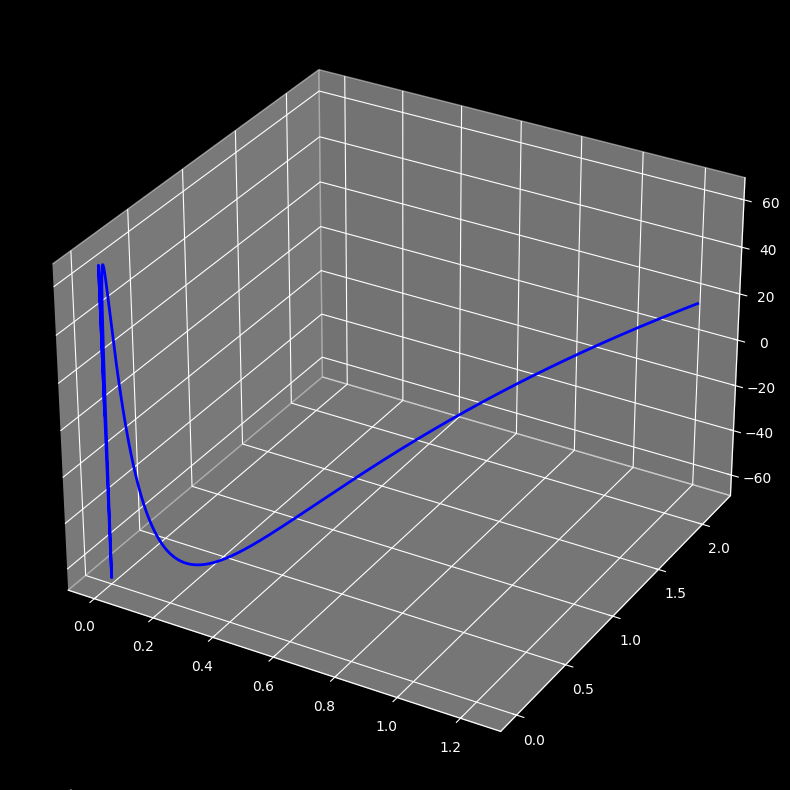

In [71]:
plt.style.use('dark_background')
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.plot(X_C4, Y_C4, Z_C4, c = 'b', linewidth = 2, label = '$\\vec{\omega}$ = (0, 10, -2)')
#plt.lim(0, 100)

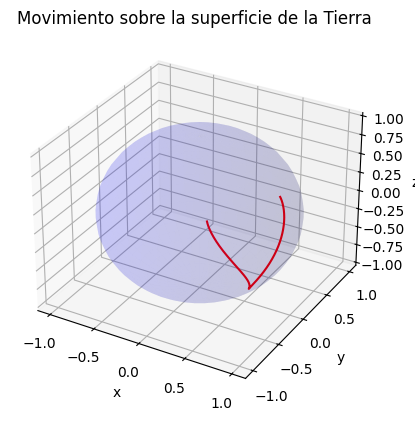

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constantes
R =   1 # Radio de la Tierra
W = 1  # Velocidad angular de rotación

# Ecuación diferencial para el movimiento del proyectil
def projectile_motion(x, t):
    theta, dtheta_dt, phi, dphi_dt = x
    dxdt = [dtheta_dt,
            np.sin(theta) * np.cos(theta) * (dphi_dt**2 + 2 * W * dphi_dt + W**2),
            dphi_dt,
            -2 * np.cos(theta) * (W * dtheta_dt + dtheta_dt * dphi_dt) / np.sin(theta)]
    return dxdt

# Condiciones iniciales y tiempo de integración
x0 = [np.pi/3, 0, 0, 0]  # [theta, dtheta_dt, phi, dphi_dt]
t = np.linspace(0, 7, 1000)

# Integra la ecuación diferencial
x = odeint(projectile_motion, x0, t)

# Calcula las coordenadas de la trayectoria
xp = R * np.sin(x[:, 0]) * np.cos(x[:, 2])
yp = R * np.sin(x[:, 0]) * np.sin(x[:, 2])
zp = R * np.cos(x[:, 0])

# Grafica la esfera de la Tierra
phi = np.linspace(0, np.pi, 30)
theta = np.linspace(0, 2 * np.pi, 40)
phi, theta = np.meshgrid(phi, theta)
x_sphere = R * np.sin(phi) * np.cos(theta)
y_sphere = R * np.sin(phi) * np.sin(theta)
z_sphere = R * np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.1)

# Grafica la trayectoria del proyectil
ax.plot(xp, yp, zp, color='r', linewidth=1.5)

# Configuración del gráfico
#ax.view_init(130, 20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Movimiento sobre la superficie de la Tierra')

plt.show()

________

In [27]:
omegaT = 0.1   #Velocidad Angular de rotación Terrestre (constante)

def body_motion(var, t):
    theta, theta2, phi, phi2 = var
    dtheta_dt, dphi_dt = theta2, phi2

    dtheta2_dt = np.sin(theta) * np.cos(theta) * ((phi2)**2 + 2*omegaT*phi2 + omegaT**2)
    dphi2_dt = -2*np.cos(theta)/np.sin(theta) * (omegaT*theta2 + theta2*phi2)
    
    return [dtheta_dt, dtheta2_dt, dphi_dt, dphi2_dt]

#Intervalo temporal en el que transcurre el movimiento

t = np.linspace(0, 500, 2000)

#Valores Iniciales variables de estado del sistema

initial_pos = [np.pi/3, 0]     #pocisiones iniciales theta, phi (rad)
initial_vel = [0,0]     #velocidades iniciales vel_theta, vel_phi

initial_params = [initial_pos[0], initial_vel[0], initial_pos[1], initial_vel[1]]


motion_solve = odeint(body_motion, initial_params, t)    #Soluciones numericas por scipy.integrate.odeint

theta_s, veltheta_s = motion_solve[:,0], motion_solve[:,1]
phi_s, velphi_s = motion_solve[:,2], motion_solve[:,3] 


#Coordenadas Cartesianas del Movimiento

xp = R * np.sin(theta_s) * np.cos(phi_s)
yp = R * np.sin(theta_s) * np.sin(phi_s)
zp = R * np.cos(theta_s)


In [ ]:
def non_inertial_mot(init_params, t_samples, t_final, RT = 6378137.0, omegaT = 7.29211e-5):


    #Intervalo temporal en el que transcurre el movimiento

    t = np.linspace(0, t_final, t_samples)
    
    solve = odeint(body_motion, init_params, t)    #Soluciones numericas por scipy.integrate.odeint
    theta_s, veltheta_s = motion_solve[:,0], motion_solve[:,1]
    phi_s, velphi_s = motion_solve[:,2], motion_solve[:,3]

    #Coordenadas Cartesianas del Movimiento

    X = R * np.sin(theta_s) * np.cos(phi_s)
    Y = R * np.sin(theta_s) * np.sin(phi_s)
    Z = R * np.cos(theta_s)
    

In [ ]:
# Grafica la esfera de la Tierra
R = 1    #Radio Terrestre en Metros

PHI = np.linspace(0, np.pi, 30)
THETA = np.linspace(0, 2 * np.pi, 40)
PHI, THETA = np.meshgrid(PHI, THETA)
x_sphere = R * np.sin(PHI) * np.cos(THETA)
y_sphere = R * np.sin(PHI) * np.sin(THETA)
z_sphere = R * np.cos(PHI)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_sphere, y_sphere, z_sphere, color='b', alpha=0.1)


#Trayectoria del Cuerpo lanzado
ax.plot(xp, yp, zp, color='r', linewidth=1.5)

plt.show()